In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df_credit=pd.read_csv('../Data/credit_clean.csv')
df_fraud=pd.read_csv('../Data/fraud_clean.csv')
df_Ip=pd.read_csv('../Data/ip_clean.csv')

- Time: The number of seconds elapsed between this transaction and the first transaction in the dataset.
- V1 to V28: These are anonymized features resulting from a PCA transformation. Their exact nature is not disclosed for privacy reasons, but they represent the underlying patterns in the data.
- Amount: The transaction amount in dollars.
- Class: The target variable where 1 indicates a fraudulent transaction and 0 indicates a non-fraudulent transaction.


In [3]:
df_credit.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

- user_id: A unique identifier for the user who made the transaction.
- signup_time: The timestamp when the user signed up.
- purchase_time: The timestamp when the purchase was made.
- purchase_value: The value of the purchase in dollars.
- device_id: A unique identifier for the device used to make the transaction.
- source: The source through which the user came to the site (e.g., SEO, Ads).
- browser: The browser used to make the transaction (e.g., Chrome, Safari).
- sex: The gender of the user (M for male, F for female).
- age: The age of the user.
- ip_address: The IP address from which the transaction was made.
- class: The target variable where 1 indicates a fraudulent transaction and 0 indicates a non-fraudulent transaction.


In [4]:
df_fraud.head()

user_id          signup_time        purchase_time  purchase_value  \
0    22058  2015-02-24 22:55:49  2015-04-18 02:47:11              34   
1   333320  2015-06-07 20:39:50  2015-06-08 01:38:54              16   
2     1359  2015-01-01 18:52:44  2015-01-01 18:52:45              15   
3   150084  2015-04-28 21:13:25  2015-05-04 13:54:50              44   
4   221365  2015-07-21 07:09:52  2015-09-09 18:40:53              39   

       device_id source browser sex  age    ip_address  class  
0  QVPSPJUOCKZAR    SEO  Chrome   M   39  7.327584e+08      0  
1  EOGFQPIZPYXFZ    Ads  Chrome   F   53  3.503114e+08      0  
2  YSSKYOSJHPPLJ    SEO   Opera   M   53  2.621474e+09      1  
3  ATGTXKYKUDUQN    SEO  Safari   M   41  3.840542e+09      0  
4  NAUITBZFJKHWW    Ads  Safari   M   45  4.155831e+08      0

- lower_bound_ip_address: The lower bound of the IP address range.
- upper_bound_ip_address: The upper bound of the IP address range.
- country: The country corresponding to the IP address range.

In [5]:
df_Ip.head()

lower_bound_ip_address  upper_bound_ip_address    country
0              16777216.0                16777471  Australia
1              16777472.0                16777727      China
2              16777728.0                16778239      China
3              16778240.0                16779263  Australia
4              16779264.0                16781311      China

In [6]:
dataframelists=[df_Ip, df_fraud, df_credit]
for i in dataframelists:
    print(i.info())
    print(i.describe())
    print(i.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lower_bound_ip_address  138846 non-null  float64
 1   upper_bound_ip_address  138846 non-null  int64  
 2   country                 138846 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ MB
None
       lower_bound_ip_address  upper_bound_ip_address
count            1.388460e+05            1.388460e+05
mean             2.724532e+09            2.724557e+09
std              8.975215e+08            8.974979e+08
min              1.677722e+07            1.677747e+07
25%              1.919930e+09            1.920008e+09
50%              3.230887e+09            3.230888e+09
75%              3.350465e+09            3.350466e+09
max              3.758096e+09            3.758096e+09
(138846, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15111

In [7]:
dataframelists=[df_Ip, df_fraud, df_credit]
for i in dataframelists:
    print(i.isnull().sum())
    

lower_bound_ip_address    0
upper_bound_ip_address    0
country                   0
dtype: int64
user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     283726 

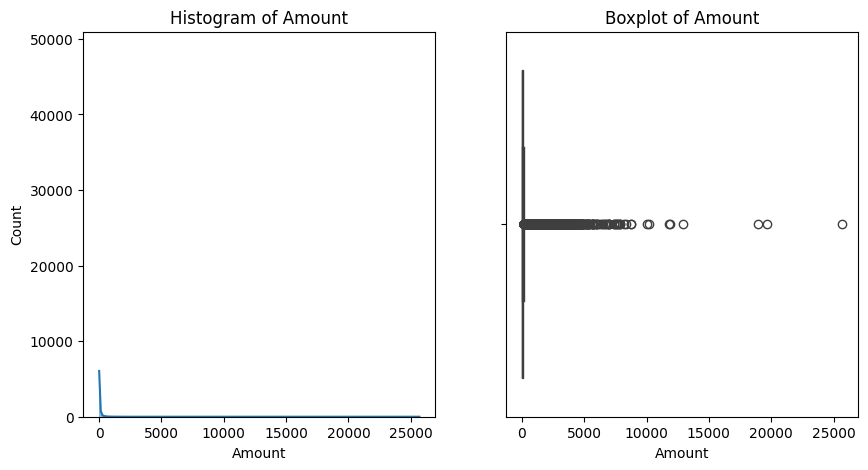

Summary statistics for Class:
count    283726.000000
mean          0.001667
std           0.040796
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Class, dtype: float64


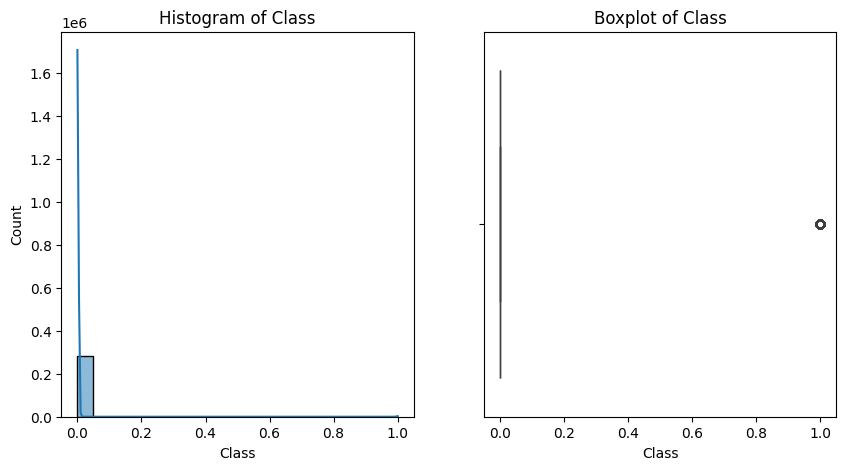

Summary statistics for purchase_value:
count    151112.000000
mean         36.935372
std          18.322762
min           9.000000
25%          22.000000
50%          35.000000
75%          49.000000
max         154.000000
Name: purchase_value, dtype: float64


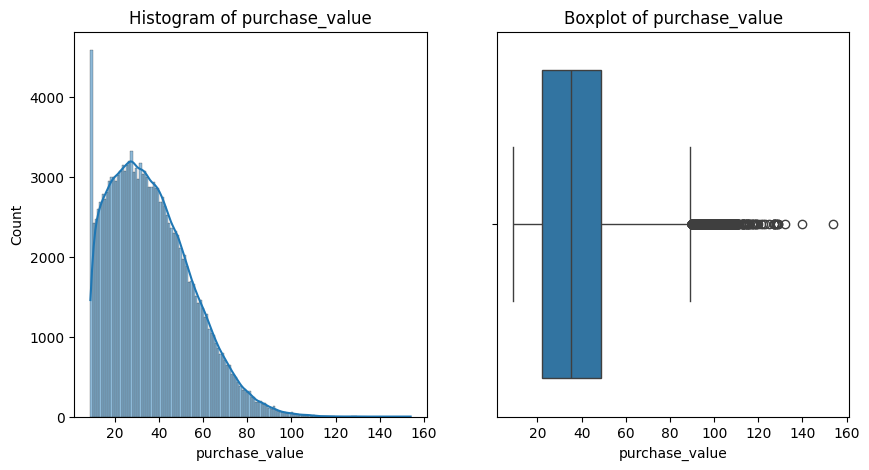

Summary statistics for browser:
count     151112
unique         5
top       Chrome
freq       61432
Name: browser, dtype: object


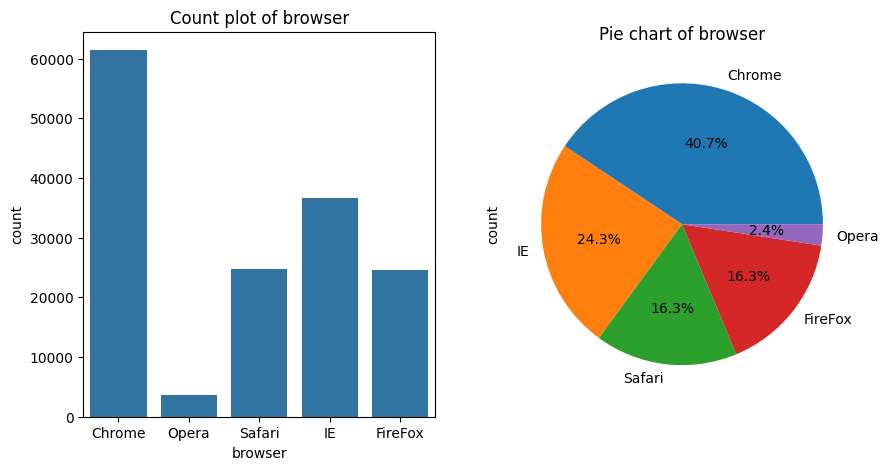

Summary statistics for country:
count            138846
unique              235
top       United States
freq              46868
Name: country, dtype: object


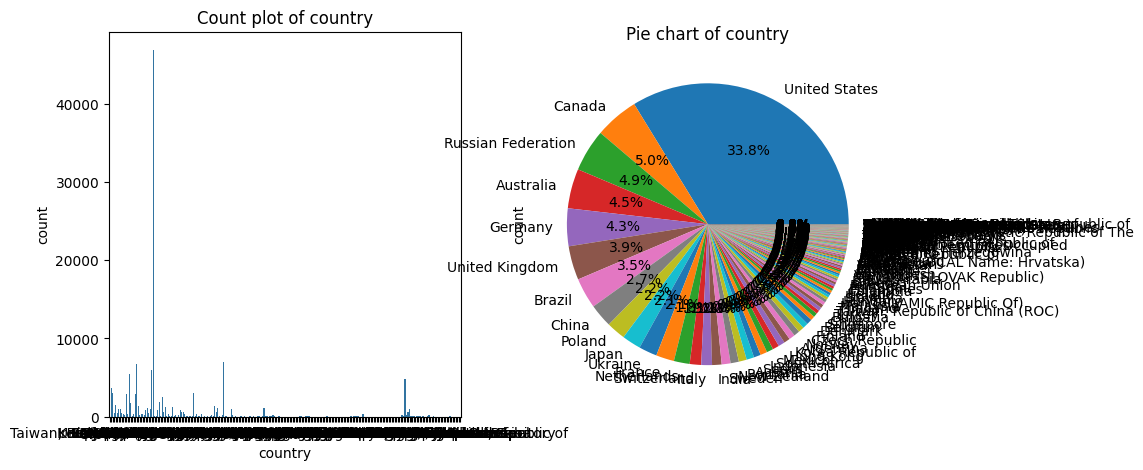

Bivariate analysis between Amount and Class:


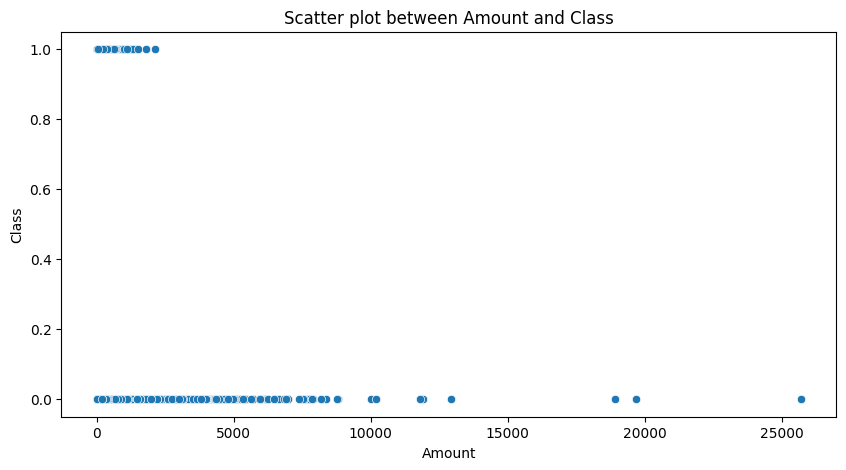

Bivariate analysis between V1 and V2:


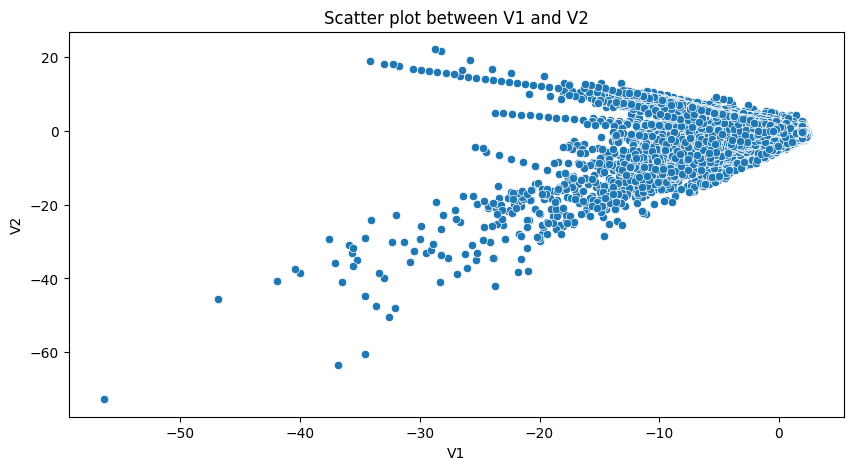

Bivariate analysis between purchase_value and class:


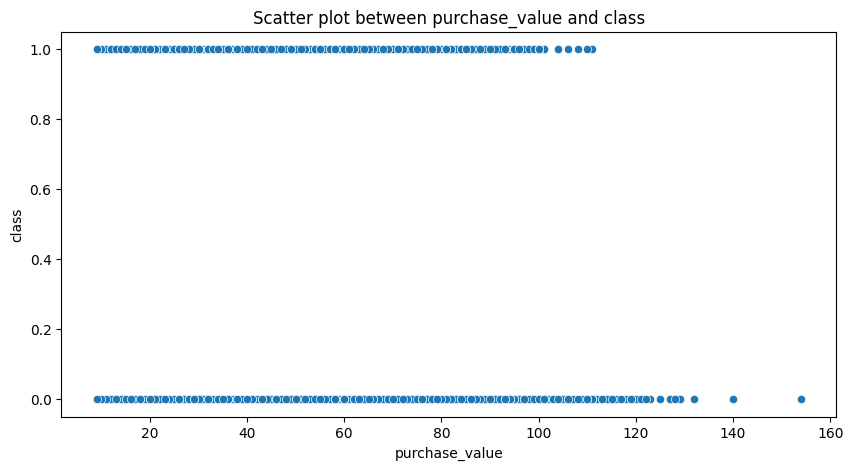

Bivariate analysis between browser and class:


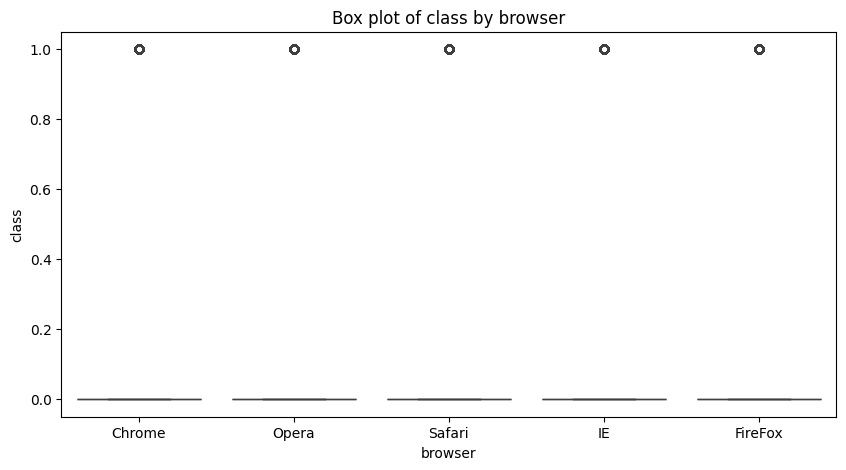

Bivariate analysis between lower_bound_ip_address and country:


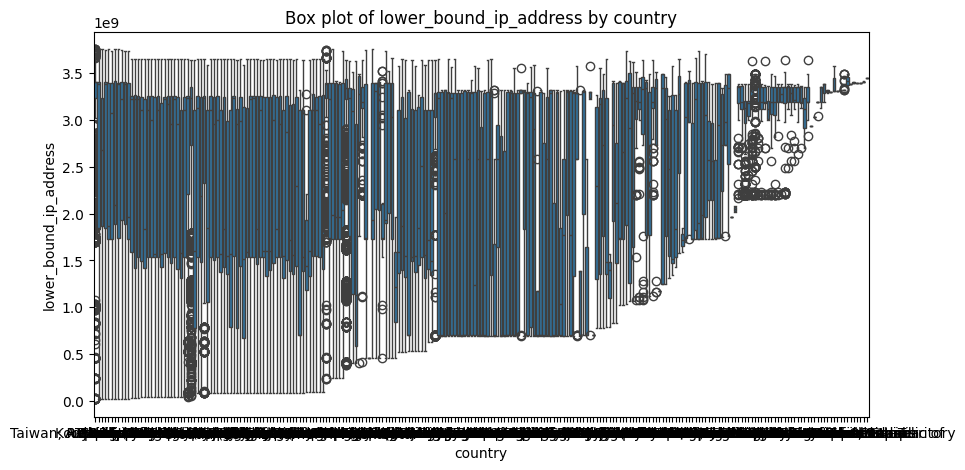

Bivariate analysis between upper_bound_ip_address and country:


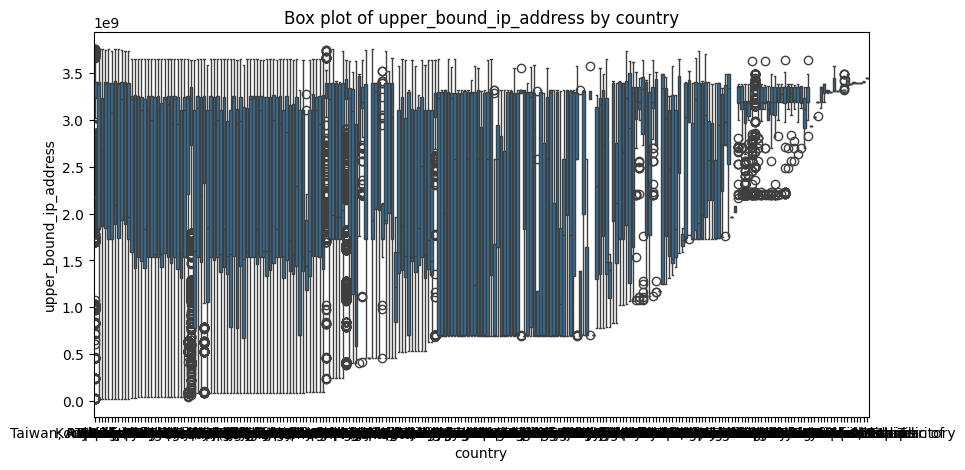

In [8]:
# Jupyter Notebook
import sys
import os

# Add the parent directory to the system path
sys.path.append(os.path.abspath(os.path.join('..', 'Scripts')))

# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from clean import clean_df_credit, clean_df_fraud, clean_df_ip
from EDA import univariate_analysis, bivariate_analysis





# Univariate Analysis
univariate_analysis(df_credit, 'Amount')
univariate_analysis(df_credit, 'Class')

univariate_analysis(df_fraud, 'purchase_value')
univariate_analysis(df_fraud, 'browser')

univariate_analysis(df_Ip, 'country')

# Bivariate Analysis
bivariate_analysis(df_credit, 'Amount', 'Class')
bivariate_analysis(df_credit, 'V1', 'V2')

bivariate_analysis(df_fraud, 'purchase_value', 'class')
bivariate_analysis(df_fraud, 'browser', 'class')

bivariate_analysis(df_Ip, 'lower_bound_ip_address', 'country')
bivariate_analysis(df_Ip, 'upper_bound_ip_address', 'country')


### Merge Datasets for Geolocation Analysis
Convert IP addresses to integer format
Merge Fraud_Data.csv with IpAddress_to_Country.csv


In [9]:
df_Ip.columns

Index(['lower_bound_ip_address', 'upper_bound_ip_address', 'country'], dtype='object')

In [10]:
df_Ip['lower_bound_ip_address'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 138846 entries, 0 to 138845
Series name: lower_bound_ip_address
Non-Null Count   Dtype  
--------------   -----  
138846 non-null  float64
dtypes: float64(1)
memory usage: 1.1 MB


In [11]:
df_Ip['lower_bound_ip_address']=df_Ip['lower_bound_ip_address'].astype(int)

In [12]:
df_Ip['lower_bound_ip_address'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 138846 entries, 0 to 138845
Series name: lower_bound_ip_address
Non-Null Count   Dtype
--------------   -----
138846 non-null  int32
dtypes: int32(1)
memory usage: 542.5 KB


In [13]:
df_Ip.head(2)

lower_bound_ip_address  upper_bound_ip_address    country
0                16777216                16777471  Australia
1                16777472                16777727      China

In [14]:
df_fraud.head(2)

user_id          signup_time        purchase_time  purchase_value  \
0    22058  2015-02-24 22:55:49  2015-04-18 02:47:11              34   
1   333320  2015-06-07 20:39:50  2015-06-08 01:38:54              16   

       device_id source browser sex  age    ip_address  class  
0  QVPSPJUOCKZAR    SEO  Chrome   M   39  7.327584e+08      0  
1  EOGFQPIZPYXFZ    Ads  Chrome   F   53  3.503114e+08      0

In [15]:
df_fraud['ip_address']=df_fraud['ip_address'].astype(int)

In [16]:
# Merge the datasets based on IP address range
df_merged = pd.DataFrame()

for index, row in df_Ip.iterrows():
    lower_bound = row['lower_bound_ip_address']
    upper_bound = row['upper_bound_ip_address']
    country = row['country']
    
    # Filter fraud data within the IP range
    filtered_data = df_fraud[(df_fraud['ip_address'] >= lower_bound) & (df_fraud['ip_address'] <= upper_bound)]
    
    # Add country column to filtered data
    filtered_data['country'] = country
    
    # Append filtered data to df_merged
    df_merged = pd.concat([df_merged, filtered_data], ignore_index=True)

# Drop unnecessary columns
df_merged = df_merged.drop(['ip_address'], axis=1)


C:\Users\ende\AppData\Local\Temp\ipykernel_16496\2171049348.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['country'] = country
C:\Users\ende\AppData\Local\Temp\ipykernel_16496\2171049348.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['country'] = country
C:\Users\ende\AppData\Local\Temp\ipykernel_16496\2171049348.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [2]:
df_merged=pd.read_csv('../Data/ip_fraud_merged.csv')
df_merged.head()

Unnamed: 0  user_id          signup_time        purchase_time  \
0           0   247547  2015-06-28 03:00:34  2015-08-09 03:57:29   
1           1   220737  2015-01-28 14:21:11  2015-02-11 20:28:28   
2           2   390400  2015-03-19 20:49:09  2015-04-11 23:41:23   
3           3    69592  2015-02-24 06:11:57  2015-05-23 16:40:14   
4           4   174987  2015-07-07 12:58:11  2015-11-03 04:04:30   

   purchase_value      device_id  source browser sex  age  ip_address  class  \
0              47  KIXYSVCHIPQBR     SEO  Safari   F   30    16778864      0   
1              15  PKYOWQKWGJNJI     SEO  Chrome   F   34    16842045      0   
2              44  LVCSXLISZHVUO     Ads      IE   M   29    16843656      0   
3              55  UHAUHNXXUADJE  Direct  Chrome   F   30    16938732      0   
4              51  XPGPMOHIDRMGE     SEO  Chrome   F   37    16971984      0   

     country  
0  Australia  
1   Thailand  
2      China  
3      China  
4   Thailand

In [4]:
df_merged = df_merged.loc[:, ~df_merged.columns.str.contains('^Unnamed')]


In [5]:
df_merged.head(2)

user_id          signup_time        purchase_time  purchase_value  \
0   247547  2015-06-28 03:00:34  2015-08-09 03:57:29              47   
1   220737  2015-01-28 14:21:11  2015-02-11 20:28:28              15   

       device_id source browser sex  age  ip_address  class    country  
0  KIXYSVCHIPQBR    SEO  Safari   F   30    16778864      0  Australia  
1  PKYOWQKWGJNJI    SEO  Chrome   F   34    16842045      0   Thailand

#### Feature Engineering
Transaction frequency and velocity for Fraud_Data.csv
Time-Based features for Fraud_Data.csv
hour_of _day
day_of_week


In [7]:
import sys
import os

# Add the parent directory to the system path
sys.path.append(os.path.abspath(os.path.join('..', 'Scripts')))

In [8]:
from FeatureEng import df_fraud  
print(df_fraud.head())


c:\Users\ende\Desktop\10x\Week-8\Scripts\FeatureEng.py:31: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  rolling_count = user_data.rolling('1H').count() - 1
c:\Users\ende\Desktop\10x\Week-8\Scripts\FeatureEng.py:31: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  rolling_count = user_data.rolling('1H').count() - 1
c:\Users\ende\Desktop\10x\Week-8\Scripts\FeatureEng.py:31: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  rolling_count = user_data.rolling('1H').count() - 1
c:\Users\ende\Desktop\10x\Week-8\Scripts\FeatureEng.py:31: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  rolling_count = user_data.rolling('1H').count() - 1
c:\Users\ende\Desktop\10x\Week-8\Scripts\FeatureEng.py:31: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.